### Carga de librerías necesarias para ETL

In [192]:
import glob
import pandas as pd
import numpy as np
import math

from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

### Extracción

In [193]:
# TODO: 
# Probablemente se debería arrancar descomprimiendo el archivo: Clou_diario_diplo.rar

### Carga de datasets
Consumos:

In [194]:
# Son archivos mensuales CSV con ; como separador
archivos_cargados=[]

# Construccion del dataframe
consumos= pd.DataFrame()

# Carga de las lectoras mensuales de consumos
for each_file in glob.glob('*FINAL.csv'):
    archivos_cargados.append(each_file)
    datos_mes = pd.read_csv(each_file, sep=";", decimal=',')
    consumos = pd.concat([consumos, datos_mes])

Contratos:

In [195]:
# Es un archivo CSV con ; como separador
qgis = pd.read_csv('QGIS_final.csv', sep=";", decimal=',')

Clima:

In [196]:
# Es un archivo de texto de ancho fijo
col_widths = [8, 6, 6, 40]

# Columnas
column_names = ['FECHA', 'TMAX', 'TMIN', 'NOMBRE']

# Archivo
file_path = 'clima.txt'

# Carga
clima = pd.read_fwf(file_path, widths=col_widths, names=column_names, header=None)

# Me quedo solo con mediciones de Cordoba
clima = clima.loc[clima['NOMBRE'].str.contains('CORDOBA')]

Observario:

In [197]:
# Es un archivo de texto con múltiples datos las precipitaciones contienen además comentarios
precipitaciones = pd.read_csv('CORDOBA OBSERVATORIO.txt', sep=";", decimal=',', encoding ='latin1', skiprows=5, nrows=31)

# Se elimina columna sin datos creada automáticamente
precipitaciones.drop('Unnamed: 13', axis=1, inplace=True)

In [198]:
# Es un archivo de texto con múltiples datos las temperaturas contienen además comentarios
temperatura_max = pd.read_csv('CORDOBA OBSERVATORIO.txt', sep=";", decimal=',', encoding ='latin1', skiprows=44, nrows=31)

# Se elimina columna sin datos creada automáticamente
temperatura_max.drop('Unnamed: 13', axis=1, inplace=True)

In [199]:
# Es un archivo de texto con múltiples datos las temperaturas contienen además comentarios
temperatura_min = pd.read_csv('CORDOBA OBSERVATORIO.txt', sep=";", decimal=',', encoding ='latin1', skiprows=82, nrows=31)

# Se elimina columna sin datos creada automáticamente
temperatura_min.drop('Unnamed: 13', axis=1, inplace=True)

In [200]:
# Es un archivo de texto con múltiples datos las temperaturas contienen además comentarios
temperatura_avg = pd.read_csv('CORDOBA OBSERVATORIO.txt', sep=";", decimal=',', encoding ='latin1', skiprows=120, nrows=31)

# Se elimina columna sin datos creada automáticamente
temperatura_avg.drop('Unnamed: 13', axis=1, inplace=True)

### Observación inicial de los datos disponibles

In [201]:
consumos.head()

,DEVICE,TV,UPDATE_TV,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,...,VALUE18,VALUE19,VALUE20,VALUE21,VALUE22,VALUE23,VALUE24,VALUE25,VALUE26,RN
0,0,01/03/2023,01/03/2023,NaN,1923.249,1923.249,986.267,476.932,460.050,0.0,...,0.0,0.976,2023-02-12 16:15:00,NaN,NaN,NaN,NaN,NaN,NaN,436592.0
1,0,02/03/2023,02/03/2023,NaN,1926.942,1926.942,988.037,477.729,461.176,0.0,...,0.0,0.448,2023-03-01 05:45:00,NaN,NaN,NaN,NaN,NaN,NaN,157145.0
2,0,03/03/2023,03/03/2023,NaN,1931.674,1931.674,990.627,478.887,462.160,0.0,...,0.0,0.732,2023-03-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,336137.0
3,0,04/03/2023,04/03/2023,NaN,1935.935,1935.935,992.869,479.820,463.246,0.0,...,0.0,0.732,2023-03-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,411506.0
4,0,05/03/2023,05/03/2023,NaN,1939.996,1939.996,994.944,480.914,464.138,0.0,...,0.0,0.732,2023-03-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,369475.0


In [202]:
qgis.head()

,DEVICE,suministro,cliente,contrato,fecha_inicio,sea,distribuidor,subestacion,zona,distrito,distrito_descripcion,grupo_lectura,ruta_lectura,orden_lectura,grupo_tarifario,codigo_tarifa,tarifa
0,0,01_AA01,LZKVIR,3,2010-06-08Z,DBOSCO,13_ACHATEAU,5282.0,A,1,CORDOBA,1,1223,168,1,190,Residencial
1,1,01_AA02,EVLNRMZ,5,2014-05-06Z,DBOSCO,13_ACHATEAU,5311.0,A,1,CORDOBA,1,1223,90,1,140,1.a/f RESIDENCIAL
2,2,01_AA03,RXXDNSQ,4,2023-10-25Z,DBOSCO,13_ACHATEAU,5076.0,A,1,CORDOBA,1,1223,414,1,140,1.a/f RESIDENCIAL
3,3,01_AA04,ZTHSMEW,2,2022-08-17Z,NaN,13_ACHATEAU,5311.0,A,1,CORDOBA,1,1223,6,1,140,1.a/f RESIDENCIAL
4,4,01_AA05,IELVEK,1,1990-06-30Z,DFUNES,13_CARAFA,1685.0,A,1,CORDOBA,3,1261,37,1,140,1.a/f RESIDENCIAL


In [203]:
clima.head()

,FECHA,TMAX,TMIN,NOMBRE
26,10062024,20.5,5.3,CORDOBA AERO
27,10062024,21.5,7.6,CORDOBA OBSERVATORIO
145,09062024,26.4,11.0,CORDOBA AERO
146,09062024,25.5,14.2,CORDOBA OBSERVATORIO
264,08062024,24.8,13.0,CORDOBA AERO


In [204]:
temperatura_avg.head()

,Día,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1,22.6,"25,6",26.7,"18,9",16.6,"16,7",13.3,23.4,"19,5",20.6,"10,1",26.0
1,2,24.5,"22,2",27.9,"18,8",16.4,"20,5",20.8,20.5,"14,1",22.4,"11,3",26.4
2,3,24.5,"23,8",27.6,"20,8",15.4,"18,5",19.2,16.3,"10,5",17.5,"15,0",16.2
3,4,26.1,"23,5",28.2,"20,8",15.2,"15,7",22.1,14.6,"12,8",16.1,"20,0",15.8
4,5,27.5,"25,8",29.3,"20,8",14.7,"16,3",17.0,16.9,"12,0",19.0,"22,2",16.5


In [205]:
print('consumos: ', consumos.shape, ' contratos:', qgis.shape, ' clima:', clima.shape, ' precipitaciones:', precipitaciones.shape, ' temperatura:',temperatura_min.shape, temperatura_avg.shape, temperatura_max.shape)

consumos:  (1717933, 30)  contratos: (4751, 17)  clima: (730, 4)  precipitaciones: (31, 13)  temperatura: (31, 13) (31, 13) (31, 13)


### Limpieza y preparación de los datasets

#### Consumos

In [206]:
# Renombro columnas (de acuerdo las instrucciones recibidas)
consumos = consumos.rename(columns={'VALUE2': 'Energia_Siempre_Positiva', 'VALUE3': 'Energia_Directa', 'VALUE4': 'Energia_Directa_Resto',
                                    'VALUE5': 'Energia_Directa_Pico', 'VALUE6': 'Energia_Directa_Valle', 'VALUE7': 'Energia_Inversa', 
                                    'VALUE8': 'Energia_Inversa_Resto', 'VALUE9': 'Energia_Inversa_Pico', 
                                    'VALUE10': 'Energia_Inversa_Valle', 'VALUE19': 'Maxima_Demanda', 'VALUE20': 'Fecha_hora'})

Verificación inicial de datos faltantes:

In [207]:
(round(consumos.isna().sum() * 100 / consumos.shape[0], 2)).astype(str) + "%"

DEVICE                        0.0%
TV                            0.0%
UPDATE_TV                     0.0%
VALUE1                      100.0%
Energia_Siempre_Positiva      0.0%
Energia_Directa               0.0%
Energia_Directa_Resto         0.0%
Energia_Directa_Pico          0.0%
Energia_Directa_Valle         0.0%
Energia_Inversa               0.0%
Energia_Inversa_Resto         0.0%
Energia_Inversa_Pico          0.0%
Energia_Inversa_Valle         0.0%
VALUE11                       0.0%
VALUE12                       0.0%
VALUE13                       0.0%
VALUE14                       0.0%
VALUE15                       0.0%
VALUE16                       0.0%
VALUE17                       0.0%
VALUE18                       0.0%
Maxima_Demanda                0.0%
Fecha_hora                    0.0%
VALUE21                     99.97%
VALUE22                     99.97%
VALUE23                     99.97%
VALUE24                     99.97%
VALUE25                     99.97%
VALUE26             

In [208]:
# Umbral para eliminar columnas sin datos 
umbral = 90 # (90% en este caso)

for column in consumos.columns:
    # Calculando el porcentaje de valores no nulos en la columna
    porcentaje = consumos[column].count() / len(consumos) * 100
    
    # Si es menor al umbral
    if porcentaje < umbral:
        # eliminamos columna
        consumos.drop(column, axis=1, inplace=True)

In [209]:
consumos['UPDATE_TV'] = pd.to_datetime(consumos['UPDATE_TV'], format='%d/%m/%Y') 

In [210]:
consumos['TV'] = pd.to_datetime(consumos['TV'], format='%d/%m/%Y') 

existen valores erroneos en 'Fecha_hora':

In [211]:
consumos.loc[consumos['Fecha_hora']=='FFFF-FF-FF  FF:FF:FF'].head()

,DEVICE,TV,UPDATE_TV,Energia_Siempre_Positiva,Energia_Directa,Energia_Directa_Resto,Energia_Directa_Pico,Energia_Directa_Valle,Energia_Inversa,Energia_Inversa_Resto,...,VALUE12,VALUE13,VALUE14,VALUE15,VALUE16,VALUE17,VALUE18,Maxima_Demanda,Fecha_hora,RN
311,10,2023-03-02,2023-03-02,2.056,2.056,1.367,0.409,0.28,0.0,0.0,...,1.744,0.395,0.482,0.0,0.0,0.0,0.0,0.0,FFFF-FF-FF FF:FF:FF,86979.0
312,10,2023-03-03,2023-03-03,2.056,2.056,1.367,0.409,0.28,0.0,0.0,...,1.744,0.395,0.482,0.0,0.0,0.0,0.0,0.0,FFFF-FF-FF FF:FF:FF,336694.0
313,10,2023-03-04,2023-03-04,2.056,2.056,1.367,0.409,0.28,0.0,0.0,...,1.744,0.395,0.482,0.0,0.0,0.0,0.0,0.0,FFFF-FF-FF FF:FF:FF,98374.0
314,10,2023-03-05,2023-03-05,2.056,2.056,1.367,0.409,0.28,0.0,0.0,...,1.744,0.395,0.482,0.0,0.0,0.0,0.0,0.0,FFFF-FF-FF FF:FF:FF,1611.0
315,10,2023-03-06,2023-03-06,2.056,2.056,1.367,0.409,0.28,0.0,0.0,...,1.744,0.395,0.482,0.0,0.0,0.0,0.0,0.0,FFFF-FF-FF FF:FF:FF,381975.0


corrección de valores erroneos con ffill

In [212]:
consumos['Fecha_hora'] = pd.to_datetime(consumos['Fecha_hora'], format='%Y-%m-%d %H:%M:%S', errors='coerce').ffill()

#### Contratos

In [213]:
(round(qgis.isna().sum() * 100 / qgis.shape[0], 2)).astype(str) + "%"

DEVICE                   0.0%
suministro               0.0%
cliente                  0.0%
contrato                 0.0%
fecha_inicio             0.0%
sea                     0.76%
distribuidor             0.0%
subestacion             0.15%
zona                     0.0%
distrito                 0.0%
distrito_descripcion     0.0%
grupo_lectura           0.02%
ruta_lectura             0.0%
orden_lectura            0.0%
grupo_tarifario          0.0%
codigo_tarifa            0.0%
tarifa                   0.0%
dtype: object

In [214]:
# TODO:
# Hacer una imputación con SimpleImputer usando la moda para cada tupla distribuidor y ruta_lectura
qgis.loc[(qgis['distribuidor']=='13_D2_SANLUIS') & (qgis['ruta_lectura']==1348) & (qgis['subestacion'].isna()), 'subestacion'] = 5209.0
qgis.loc[(qgis['distribuidor']=='13_D2_SANLUIS') & (qgis['ruta_lectura']==1287) & (qgis['subestacion'].isna()), 'subestacion'] = 3122.0
qgis.loc[(qgis['distribuidor']=='13_D2_SANLUIS') & (qgis['ruta_lectura']==1201) & (qgis['subestacion'].isna()), 'subestacion'] = 3193.0
qgis.loc[(qgis['distribuidor']=='13_OPERA') & (qgis['subestacion'].isna()), 'subestacion'] = 3982.0
qgis.loc[(qgis['distribuidor']=='13_D10_LIBERTAD') & (qgis['subestacion'].isna()), 'subestacion'] = 3638.0

Validación de los campos fecha:

In [215]:
qgis['fecha_inicio'] = pd.to_datetime(qgis['fecha_inicio'].replace('Z','', regex=True), format='%Y-%m-%d') 

#### Clima

In [216]:
clima['FECHA'] = pd.to_datetime(clima['FECHA'], format='%d%m%Y') 

#### Precipitaciones

Asignación de valores en las precipitaciones:

In [217]:
# S/P equivale a "no llovió", <0.1 equivale a 0.1
precipitaciones = precipitaciones.replace('S/P',0).replace('<0.1',0.1).replace(',','.', regex=True)

In [218]:
precipitaciones.apply(pd.to_numeric)

,Día,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1,3.0,22.5,0.1,0.1,0.0,0.0,0.0,0,0.0,0.0,10.0,0.6
1,2,0.0,0.0,0.0,2.0,0.1,0.0,0.0,0,3.0,0.0,0.0,1.0
2,3,1.0,0.0,0.0,0.0,0.1,0.1,0.0,0,0.2,0.0,0.0,3.0
3,4,0.0,0.0,0.0,0.1,9.0,0.1,0.0,0,0.0,0.0,0.0,4.0
4,5,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0,0.0,0.0,0.0,4.0
5,6,0.0,0.0,22.0,0.0,0.0,0.0,0.1,0,2.0,0.0,0.0,0.2
6,7,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
7,8,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0,0.0,0.0,0.0,0.0
8,9,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0.0,0.0,0.0,0.0
9,10,9.5,0.0,0.0,0.0,0.0,0.0,9.5,0,0.0,0.0,0.0,0.0


#### Temperaturas

In [219]:
temperatura_min = temperatura_min.replace('s/d',np.NaN).replace(',','.', regex=True)
temperatura_avg = temperatura_avg.replace('s/d',np.NaN).replace(',','.', regex=True)
temperatura_max = temperatura_max.replace('s/d',np.NaN).replace(',','.', regex=True)

In [220]:
temperatura_min.apply(pd.to_numeric)
temperatura_avg.apply(pd.to_numeric)
temperatura_max.apply(pd.to_numeric)

,Día,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1,30.1,30.2,33.0,24.7,20.0,24.8,23.1,34.5,28.6,29.0,12.5,35.0
1,2,32.1,28.2,37.8,20.6,20.5,27.4,27.6,30.0,23.6,30.1,14.4,33.0
2,3,31.5,29.0,35.2,26.6,19.2,24.3,25.5,21.5,13.6,24.4,24.5,27.6
3,4,33.5,29.0,37.5,24.7,18.4,19.2,30.1,23.3,17.4,23.4,27.5,18.3
4,5,35.5,32.6,37.2,25.4,16.5,21.6,20.5,23.0,17.4,27.7,30.5,19.5
5,6,36.7,35.3,35.5,28.3,21.7,26.2,16.0,26.0,16.2,29.6,33.8,28.4
6,7,38.2,36.7,32.1,29.4,26.4,21.5,14.5,18.7,20.4,28.2,43.7,32.5
7,8,37.8,32.7,36.2,29.8,24.8,29.6,20.8,17.0,18.8,31.2,30.3,30.0
8,9,38.2,34.5,36.2,30.4,27.5,23.2,16.8,19.7,24.2,32.6,29.6,27.4
9,10,39.5,35.2,37.4,30.6,23.4,14.9,15.8,26.0,35.0,38.5,29.5,32.8


#### Manejo de fechas

In [221]:
print('Rango de fechas de los consumos:',consumos['Fecha_hora'].min(),'-',consumos['Fecha_hora'].max())
print('Rango de fechas de los contratos:',qgis['fecha_inicio'].min(),'-',qgis['fecha_inicio'].max())
print('Rango de fechas del clima:',clima['FECHA'].min(),'-',clima['FECHA'].max())


Rango de fechas de los consumos: 2023-01-01 00:15:00 - 2023-12-31 00:00:00
Rango de fechas de los contratos: 1990-06-30 00:00:00 - 2024-06-04 00:00:00
Rango de fechas del clima: 2023-06-12 00:00:00 - 2024-06-10 00:00:00


Unificamos los 4 dataset con datos de Observatorio en una único dataset en formato tabular:

In [222]:
# Creamos una función para pasar del formato calendario al tabular
def process_data(data, var_name):
    melted_data = data.melt('Día', var_name='Fecha', value_name=var_name)
    melted_data['Fecha'] = pd.to_datetime('2023' + melted_data['Fecha'].replace('Ene','Jan').replace('Abr','Apr').replace('Ago','Aug').replace('Dic','Dec')
                                          + melted_data.pop('Día').astype(str), format='%Y%b%d', errors='coerce')
    melted_data = melted_data.dropna(subset=['Fecha'])
    melted_data[var_name]= melted_data[var_name].apply(pd.to_numeric)
    return melted_data

# Procesamos cada dataset del Observatorio y los combinamos
observatorio = process_data(temperatura_max, 'Temperatura_max')
observatorio = observatorio.merge(process_data(temperatura_min, 'Temperatura_min'), how='left', on='Fecha')
observatorio = observatorio.merge(process_data(temperatura_avg, 'Temperatura_avg'), how='left', on='Fecha')
observatorio = observatorio.merge(process_data(precipitaciones, 'Precipitaciones'), how='left', on='Fecha')

Eliminamos datos del dataset Clima que están fuera del rango útil:

In [223]:
clima = clima.loc[(clima['FECHA']>='2023-01-01') & (clima['FECHA']<='2023-12-31')].sort_values('FECHA')

Agregamos al dataset de consumos datos del clima provenientes de Observatorio

In [224]:
consumos = consumos.merge(observatorio, how='left', left_on='TV', right_on='Fecha')

In [225]:
consumos.drop('Fecha', axis=1, inplace=True)

#### Creación de Nuevas Variables

In [226]:
# Día de la semana en el cual se realiza la medición.
# 0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'
# consumos['Dia_Consumo'] = consumos['Fecha_hora'].dt.day_name() # Nombre del día
consumos['Dia_Consumo'] = consumos['TV'].dt.dayofweek # Categorizada

# Mes del año en el cual se realiza la medición.
consumos['Mes_Consumo'] = pd.DatetimeIndex(consumos['TV']).month

In [227]:
# Laboral / No laboral: 
# No laboral: Sábados y Domingos
consumos.loc[consumos['Dia_Consumo'] >= 5, 'Laboral'] = 0
# consumos.loc[consumos['Dia_Consumo'].str.contains('|'.join(['Saturday', 'Sunday'])), 'Laboral'] = 0 # Si usamos el día no categorizado

# No laboral: Feriados nacionales: https://www.argentina.gob.ar/interior/feriados-nacionales-2023 
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-01-01','2023-01-01')), 'Laboral'] = 0 #1. Año Nuevo
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-02-20','2023-02-21')), 'Laboral'] = 0 #20, 21. Carnaval
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-03-24','2023-03-24')), 'Laboral'] = 0 #24. Día Nacional de la Memoria por la Verdad y la Justicia
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-04-02','2023-04-02')), 'Laboral'] = 0 #2. Día del Veterano
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-04-06','2023-04-07')), 'Laboral'] = 0 #6, 7 Semana Santa
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-04-24','2023-04-24')), 'Laboral'] = 0 #24. Día de acción por la tolerancia y el respeto entre los pueblos
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-05-01','2023-05-01')), 'Laboral'] = 0 #1. Día del Trabajador
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-05-25','2023-05-26')), 'Laboral'] = 0 #25. Día de la Revolución de Mayo y puente
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-06-17','2023-06-17')), 'Laboral'] = 0 #17. Paso a la Inmortalidad del Gral. Don Martín Miguel de Güemes
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-06-19','2023-06-20')), 'Laboral'] = 0 #20. Paso a la Inmortalidad del Gral. Manuel Belgrano y puente
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-07-09','2023-07-09')), 'Laboral'] = 0 #9. Día de la Independencia
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-08-21','2023-08-21')), 'Laboral'] = 0 #21. Paso a la Inmortalidad del Gral. José de San Martín (17/8)
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-10-13','2023-10-16')), 'Laboral'] = 0 #13. Feriado con fines turísticos y 16. Día del Respeto a la Diversidad Cultural (12/10)
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-11-20','2023-11-20')), 'Laboral'] = 0 #20. Día de la Soberanía Nacional
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-12-08','2023-12-08')), 'Laboral'] = 0 #8. Inmaculada Concepción de María
consumos.loc[(consumos['TV'].dt.strftime('%Y-%m-%d').between('2023-12-25','2023-12-25')), 'Laboral'] = 0 #25. Navidad

# Laboral: Resto de las fechas se consideran laborales
consumos['Laboral'] = consumos['Laboral'].fillna(1)

### Diccionario de datos: consumos

Medición:

* DEVICE = MEDIDOR
* TV = EL MOMENTO EN QUE SE REALIZA LA MEDICIÓN
* UPDATE_TV = ES CUANDO SE GUARDA EL REGISTRO DE LA MEDICIÓN
* Fecha_hora: Período en el que se aplica un tarifa?

---
Energía:

"Energía inversa" indica a aquellos usuarios que generan electricidad y aportan a la red de distribución.

(no disponible como variable) Consumo Diario = Energia_Siempre_Positiva en t - Energia_Siempre_Positiva en t-1

* Energia_Siempre_Positiva (acumulada)= Energia_Directa (consumida de la red) + Energia_Inversa (inyectada a la red). En Kwh

* Energia_Directa = Energia_Directa_Resto + Energia_Directa_Pico + Energia_Directa_Valle

* Energia_Inversa = Energia_Inversa_Resto + Energia_Inversa_Pico + Energia_Inversa_Valle

Siendo:

..._Resto: de 5 a 18hs

..._Pico: de 18 a 23hs

..._Valle: de 23 a 5hs

Campos: VALUE11, VALUE12, VALUE13, VALUE14: relacionados con la energía tomada de la red 
* VALUE11_Directa = VALUE12_Directa_Resto + VALUE13_Directa_Pico + VALUE14_Directa_Valle
* VALUE11 = Energía_Reactiva_Directa
* VALUE12 = Energía_Reactiva_Directa_Resto 
* VALUE13 = Energía_Reactiva_Directa_Pico 
* VALUE14 = Energía_Reactiva_Directa_Valle

Campos: VALUE15, VALUE16, VALUE17, VALUE18: relacionados con la energía inyectada a la red
* VALUE15_Inversa = VALUE12_Inversa_Resto + VALUE13_Inversa_Pico + VALUE14_Inversa_Valle
* VALUE15 = Energía_Reactiva_Inversa
* VALUE16 = Energía_Reactiva_Inversa_Resto 
* VALUE17 = Energía_Reactiva_Inversa_Pico 
* VALUE18 = Energía_Reactiva_Inversa_Valle

---
Demanda: Kw

* Maxima_Demanda: máximo de demanda en Kw del día.

---
Entorno:

* Dia_Consumo: 0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'

* Mes_Consumo: 1: Enero ... al 12: Diciembre

* Laboral: 1: Si, 0: No

* Temperatura_max, Temperatura_min, Temperatura_avg: temperatura ºC

* Precipitaciones: en mm

### Diccionario de datos: qgis

Las siguientes variables representan lo mismo debería quedar una:

* DEVICE = MEDIDOR
* suministro = número de medidor (innominado)

DEVICE == suministro

* cliente = nombre de cliente (innominado)
* contrato = cuantas veces fue contratado el servicio por diferentes personas

---
Las siguientes variables representan lo mismo debería quedar una:
* distrito
* distrito_descripcion
* zona

distrito (1, 23) == distrito_descripcion (Cordoba / Villa Allende) == zona (A/E)

La representación/granularidad geografica parece ser:

distrito/distrito_descripcion/zona -> sea -> distribuidor -> subestacion -> suministro/DEVICE

siendo:
* distribuidor = Cable de media tensión que se utiliza
* subestacion = subestación transformadora

---
* fecha_inicio: fecha de inicio del contrato? fecha de instalación del medidor?

* grupo_lectura > ruta_lectura > orden_lectura

* grupo_tarifario: agrupa las diferentes clases de tarifas

Las siguientes variables representan lo mismo debería quedar una:
* codigo_tarifa
* tarifa

codigo_tarifa == tarifa



Cómo leer la factura..?

https://ersep.cba.gov.ar/energia-electrica/factura-epec/

### Carga de librerías necesarias para Análisis exploratorio

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
print('Dataset tiene filas y columnas: ', consumos.shape, '\n')
print('Nombre columnas del dataset: ', '\n', consumos.columns, '\n')
print('Tipo de dato de cada columna: ', '\n', consumos.dtypes , '\n')
print('Descripción estadística: ', '\n', consumos.describe(), '\n')

Dataset tiene filas y columnas:  (1717933, 30) 

Nombre columnas del dataset:  
 Index(['DEVICE', 'TV', 'UPDATE_TV', 'Energia_Siempre_Positiva',
       'Energia_Directa', 'Energia_Directa_Resto', 'Energia_Directa_Pico',
       'Energia_Directa_Valle', 'Energia_Inversa', 'Energia_Inversa_Resto',
       'Energia_Inversa_Pico', 'Energia_Inversa_Valle', 'VALUE11', 'VALUE12',
       'VALUE13', 'VALUE14', 'VALUE15', 'VALUE16', 'VALUE17', 'VALUE18',
       'Maxima_Demanda', 'Fecha_hora', 'RN', 'Temperatura_max',
       'Temperatura_min', 'Temperatura_avg', 'Precipitaciones', 'Dia_Consumo',
       'Mes_Consumo', 'Laboral'],
      dtype='object') 

Tipo de dato de cada columna:  
 DEVICE                               int64
TV                          datetime64[ns]
UPDATE_TV                   datetime64[ns]
Energia_Siempre_Positiva           float64
Energia_Directa                    float64
Energia_Directa_Resto              float64
Energia_Directa_Pico               float64
Energia_Directa_Va

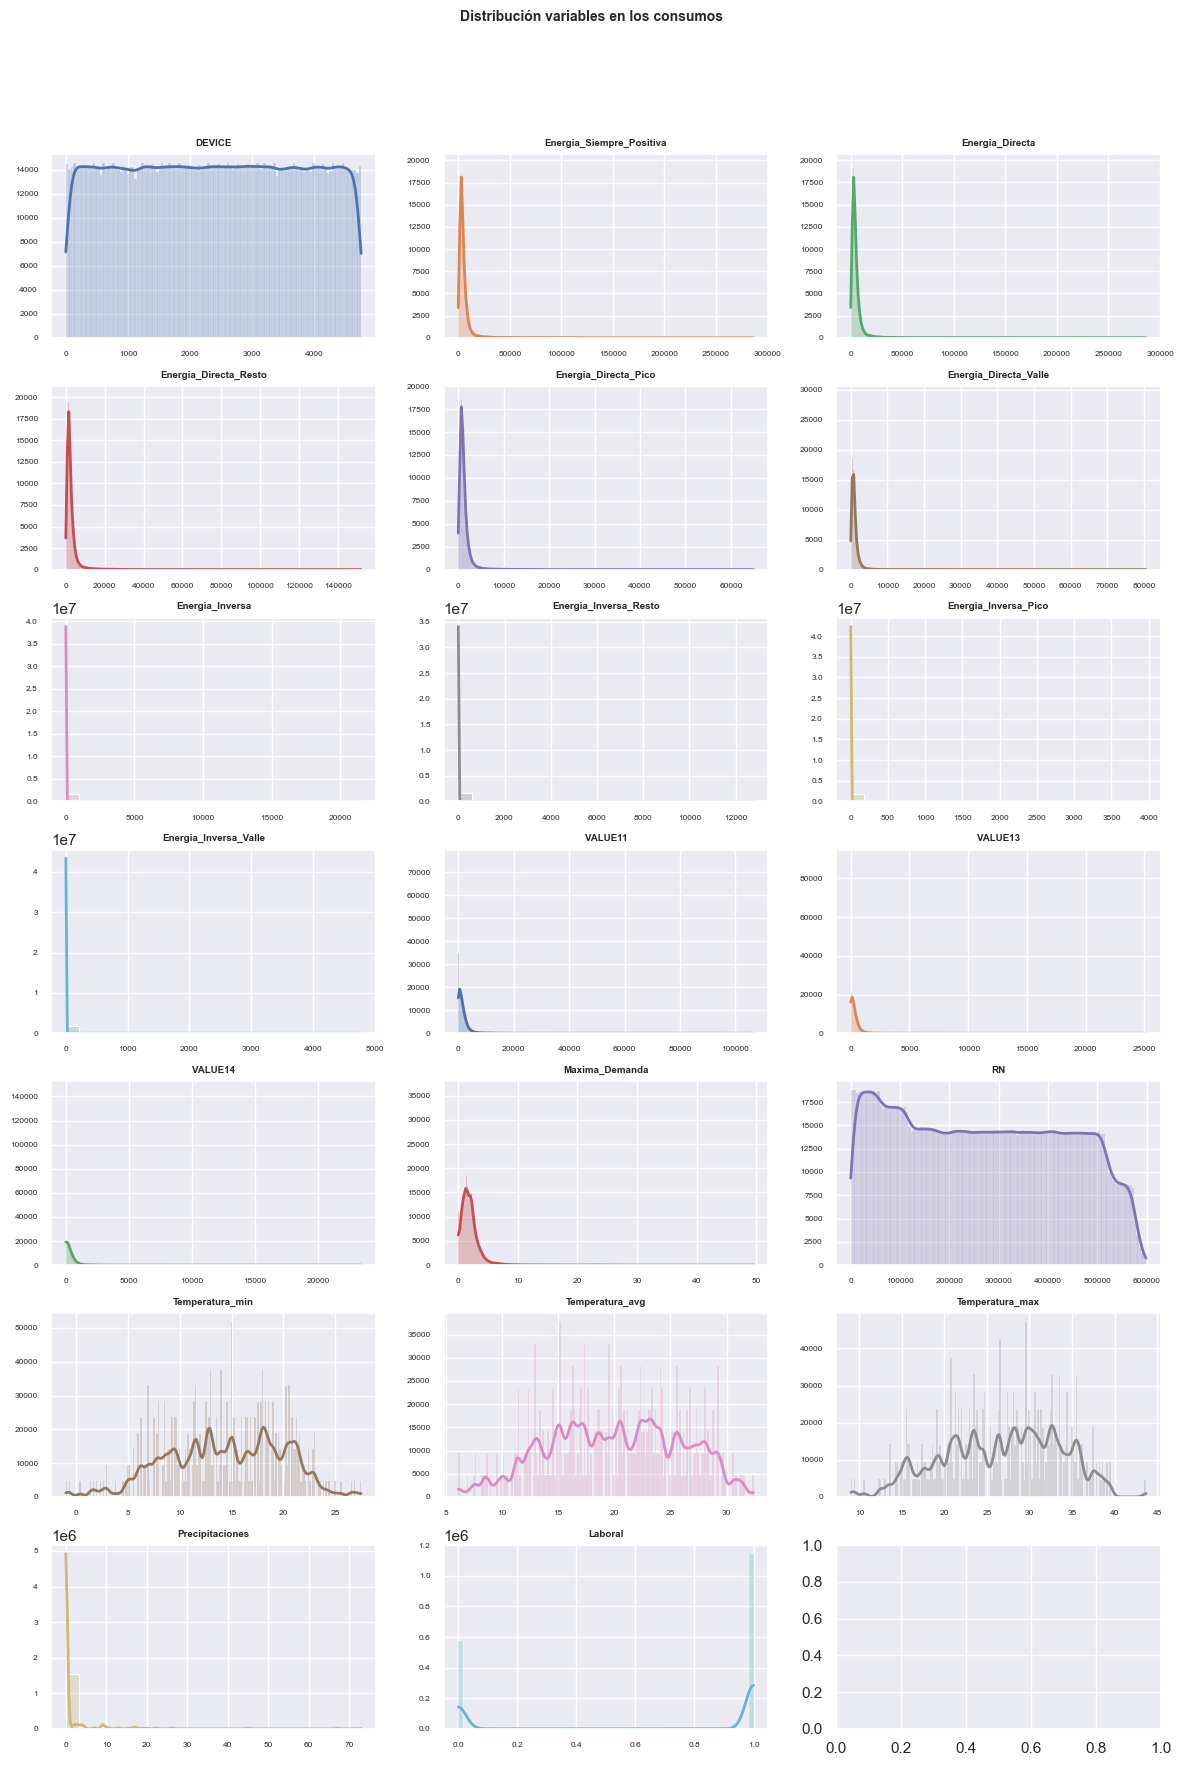

In [230]:
# Gráfico de distribución para cada variable
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(12, 18))
axes = axes.flat
numeric_features = consumos.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features = ('DEVICE',
 'Energia_Siempre_Positiva',
 'Energia_Directa',
 'Energia_Directa_Resto',
 'Energia_Directa_Pico',
 'Energia_Directa_Valle',
 'Energia_Inversa',
 'Energia_Inversa_Resto',
 'Energia_Inversa_Pico',
 'Energia_Inversa_Valle',
 'VALUE11',
 'VALUE13',
 'VALUE14',
 'Maxima_Demanda',
 'RN',
 'Temperatura_min',
 'Temperatura_avg',
 'Temperatura_max',
 'Precipitaciones',
 'Laboral')

for i, colum in enumerate(numeric_features):
    sns.histplot(
        data    = consumos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables en los consumos', fontsize = 10, fontweight = "bold");

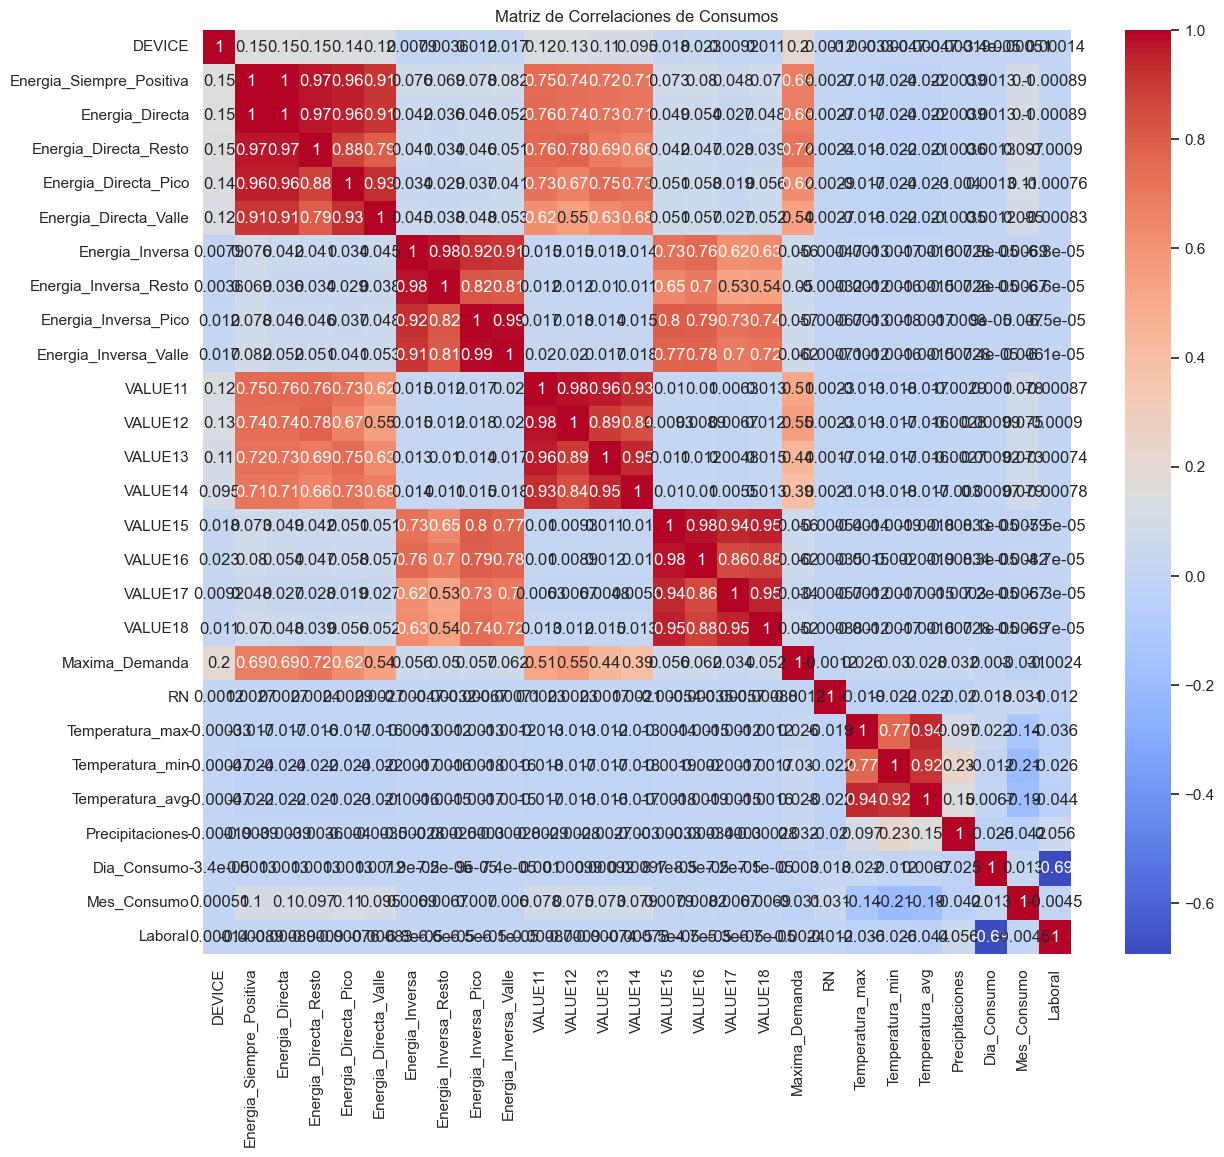

In [231]:
# Matriz de correlaciones
corr_consumos = consumos.corr(numeric_only = True)

# Heatmap
plt.figure(figsize = (14, 12))
sns.heatmap(corr_consumos, annot = True, cmap = 'coolwarm')
plt.title('Matriz de Correlaciones de Consumos')

plt.show()

In [232]:
print('Dataset tiene filas y columnas: ', qgis.shape, '\n')
print('Nombre columnas del dataset: ', '\n', qgis.columns, '\n')
print('Tipo de dato de cada columna: ', '\n', qgis.dtypes , '\n')
print('Descripción estadística: ', '\n', qgis.describe(), '\n')

Dataset tiene filas y columnas:  (4751, 17) 

Nombre columnas del dataset:  
 Index(['DEVICE', 'suministro', 'cliente', 'contrato', 'fecha_inicio', 'sea',
       'distribuidor', 'subestacion', 'zona', 'distrito',
       'distrito_descripcion', 'grupo_lectura', 'ruta_lectura',
       'orden_lectura', 'grupo_tarifario', 'codigo_tarifa', 'tarifa'],
      dtype='object') 

Tipo de dato de cada columna:  
 DEVICE                           int64
suministro                      object
cliente                         object
contrato                         int64
fecha_inicio            datetime64[ns]
sea                             object
distribuidor                    object
subestacion                    float64
zona                            object
distrito                         int64
distrito_descripcion            object
grupo_lectura                   object
ruta_lectura                     int64
orden_lectura                    int64
grupo_tarifario                  int64
codigo_tar

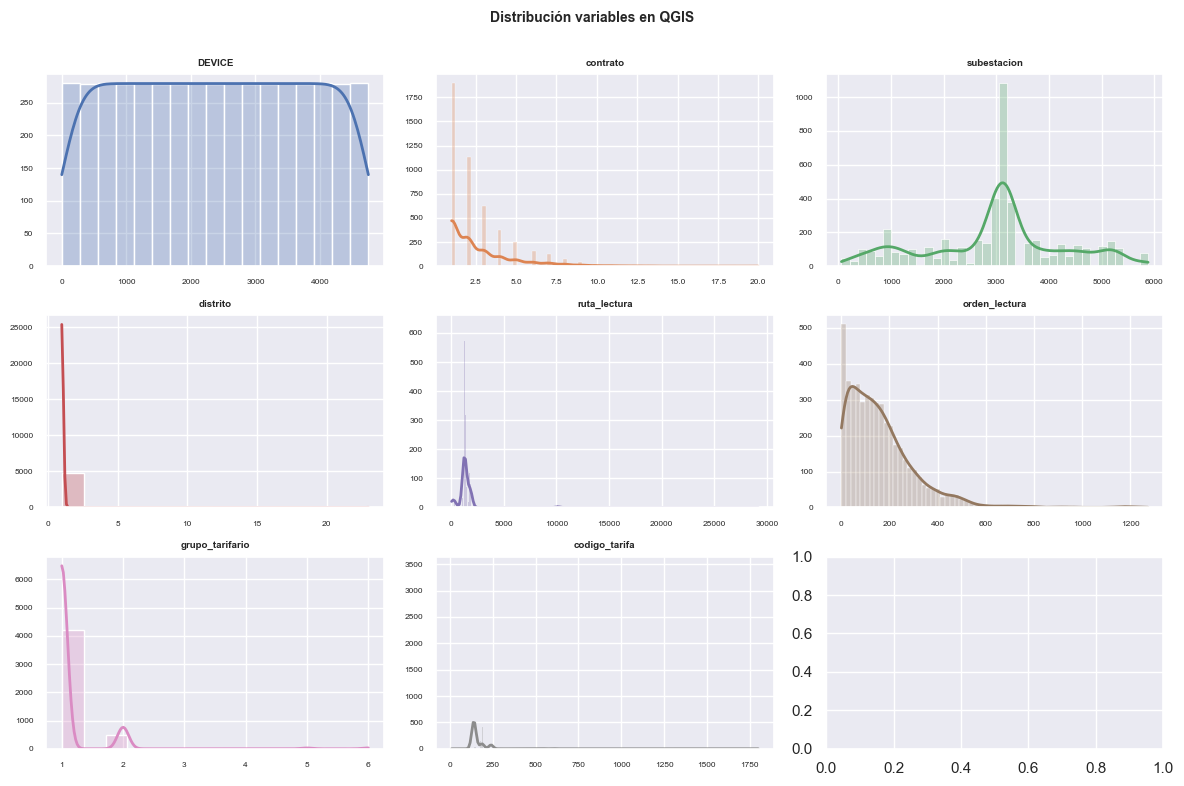

In [233]:
# Gráfico de distribución para cada variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flat
numeric_features = qgis.select_dtypes(include=['float64', 'int64']).columns.tolist()

for i, colum in enumerate(numeric_features):
    sns.histplot(
        data    = qgis,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables en QGIS', fontsize = 10, fontweight = "bold");

In [234]:
qgis[numeric_features].corr()

,DEVICE,contrato,subestacion,distrito,ruta_lectura,orden_lectura,grupo_tarifario,codigo_tarifa
DEVICE,1.000000,-0.112211,-0.018497,0.019816,0.085053,0.106779,0.154878,0.123834
contrato,-0.112211,1.000000,-0.049145,0.001891,-0.034872,0.005270,0.042537,0.000476
subestacion,-0.018497,-0.049145,1.000000,0.031888,-0.028278,0.031563,0.036553,0.015501
distrito,0.019816,0.001891,0.031888,1.000000,0.134901,-0.013262,0.006257,0.006290
ruta_lectura,0.085053,-0.034872,-0.028278,0.134901,1.000000,-0.061498,0.504838,0.332511
orden_lectura,0.106779,0.005270,0.031563,-0.013262,-0.061498,1.000000,-0.056272,-0.040088
grupo_tarifario,0.154878,0.042537,0.036553,0.006257,0.504838,-0.056272,1.000000,0.676625
codigo_tarifa,0.123834,0.000476,0.015501,0.006290,0.332511,-0.040088,0.676625,1.000000


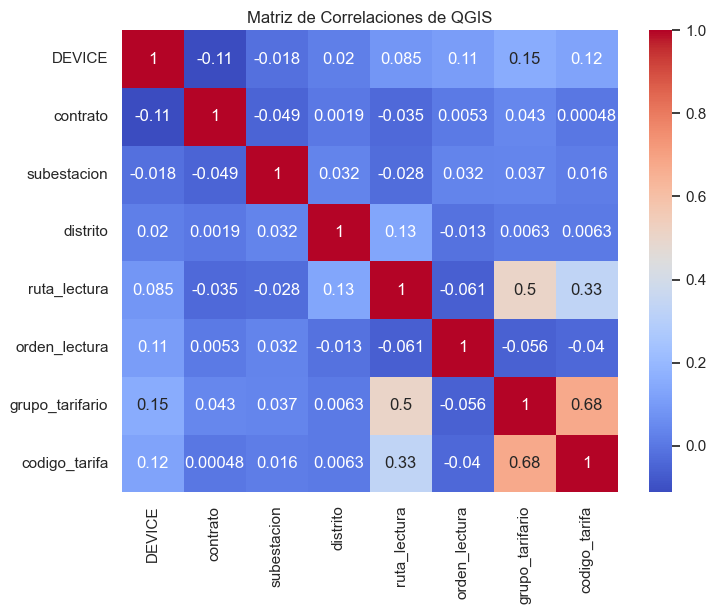

In [235]:
# Matriz de correlaciones
corr_qgis = qgis.corr(numeric_only = True)

# Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(corr_qgis, annot = True, cmap = 'coolwarm')
plt.title('Matriz de Correlaciones de QGIS')

plt.show()

<Axes: xlabel='grupo_tarifario', ylabel='tarifa'>

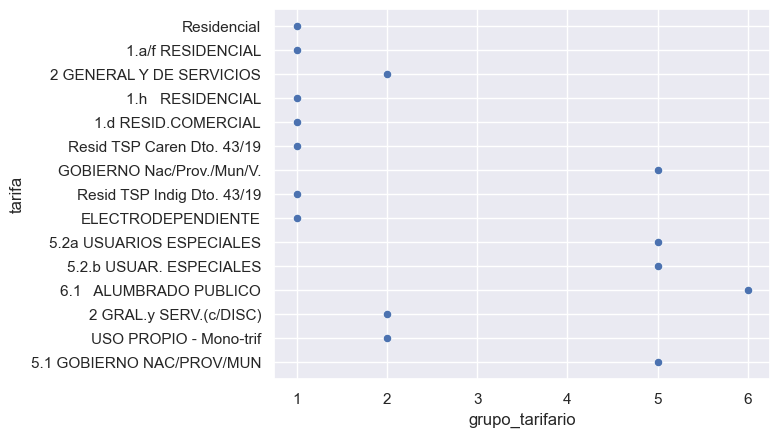

In [236]:
sns.scatterplot(data=qgis, x='grupo_tarifario', y='tarifa')

<Axes: xlabel='grupo_lectura', ylabel='ruta_lectura'>

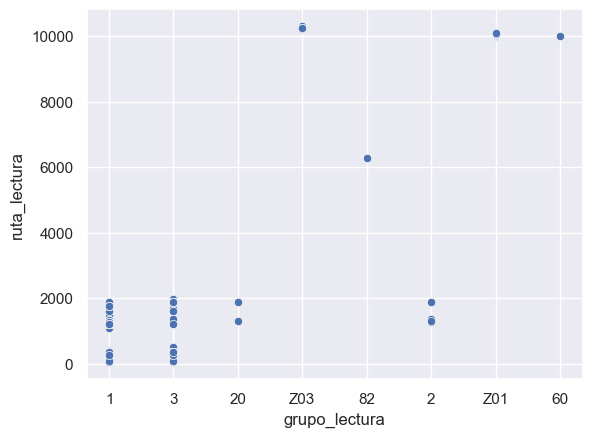

In [237]:
sns.scatterplot(data=qgis, x='grupo_lectura', y='ruta_lectura')

### Objetivo del proyecto:

Establecer un modelo de hábitos de consumo de la energía eléctrica en los tres tramos horarios establecidos por el mercado correlacionados por día hábil (weekday) o fin de semana (weekend), condiciones ambientales (temperatura y humedad) y por tipo tarifario.

Los tramos horarios son resto (5am a 6pm), pico, (6pm a 11pm) y valle (11pm a 5am).

Los hábitos de consumo estarán vinculados además a la demanda contratada con el fin de establecer el factor de uso de la misma.

El modelo establecido deberá tener la capacidad de constituir en un estimador válido de hábitos de consumo para suministros que no posean medidores inteligentes.

Con éste proyecto trataremos de responder algunas de las siguientes preguntas: 

Comportamiento de la demanda:
* Identificar la causa de los picos, valles y consumos medios.
* Identificar como afectan las variables exógenas (temperatura, humedad, lluvia, feriados, vacaciones, días laborales, datos socio económicos, subsidios, etc)
* Identificación de grupos tarifarios
* Predicción de la demanda energética
* Cuales subestaciones se encuentran sobredimensionadas.

---

#### Creación de Variable Objetivo

Agregando la variable 'Consumo' para el consumo diario de cada medidor. Consumo es el delta de lectura de la Energía entre el período anterior y el período actual. Para determinar el Consumo usaremos  Energia_Directa dado que es el objetivo a estimar.

In [238]:
for medidor in consumos['DEVICE'].unique():
    # Filtramos de 'consumos' para cada 'medidor' ordenando por fecha de consumo
    filtered_consumos = consumos.loc[consumos['DEVICE'] == medidor].sort_values('TV')
    
    # Calculamos el cambio porcentual y asignarlo a 'cambio'
    # usaremos pct_change para calcular la fracción de cambio entre filas
    # cuando el medidor estaba funcionando y pasa a cero genera un NaN
    cambio = filtered_consumos['Energia_Directa'].pct_change(1).fillna(0)
    
    # Cuando el medidor estaba en 0 y empieza a funcinar el cambio tiende a infinito
    filtered_consumos['cambio'] = cambio.replace(math.inf,1)
    
    # Actualizamos 'consumos[] agregando una columna 'consuno' (en este caso diario) con valores calculados
    consumos.loc[consumos['DEVICE'] == medidor, 'consumo'] = filtered_consumos['cambio']*filtered_consumos['Energia_Directa']

In [239]:
consumos.columns

Index(['DEVICE', 'TV', 'UPDATE_TV', 'Energia_Siempre_Positiva',
       'Energia_Directa', 'Energia_Directa_Resto', 'Energia_Directa_Pico',
       'Energia_Directa_Valle', 'Energia_Inversa', 'Energia_Inversa_Resto',
       'Energia_Inversa_Pico', 'Energia_Inversa_Valle', 'VALUE11', 'VALUE12',
       'VALUE13', 'VALUE14', 'VALUE15', 'VALUE16', 'VALUE17', 'VALUE18',
       'Maxima_Demanda', 'Fecha_hora', 'RN', 'Temperatura_max',
       'Temperatura_min', 'Temperatura_avg', 'Precipitaciones', 'Dia_Consumo',
       'Mes_Consumo', 'Laboral', 'consumo'],
      dtype='object')

In [240]:
qgis.columns

Index(['DEVICE', 'suministro', 'cliente', 'contrato', 'fecha_inicio', 'sea',
       'distribuidor', 'subestacion', 'zona', 'distrito',
       'distrito_descripcion', 'grupo_lectura', 'ruta_lectura',
       'orden_lectura', 'grupo_tarifario', 'codigo_tarifa', 'tarifa'],
      dtype='object')

In [241]:
consumos['consumo'].describe()

count    1.717933e+06
mean     9.444274e+00
std      1.934481e+01
min      0.000000e+00
25%      3.334481e+00
50%      5.630099e+00
75%      9.795117e+00
max      5.123193e+03
Name: consumo, dtype: float64

In [242]:
features_interesantes_consumo = ['DEVICE', 'TV', 'consumo', 'Maxima_Demanda','Temperatura_max', 'Temperatura_min', 
                         'Temperatura_avg', 'Precipitaciones', 'Dia_Consumo', 'Mes_Consumo', 'Laboral']

In [243]:
features_interesantes_qgis = ['DEVICE','contrato','grupo_tarifario','subestacion','codigo_tarifa']

In [244]:
modelo = consumos[features_interesantes_consumo]

In [245]:
modelo = modelo.merge(qgis[features_interesantes_qgis], how='left', on='DEVICE')

In [252]:
# Debería eliminar la identificación del medidor del modelo
modelo.drop('DEVICE', axis=1, inplace=True)

In [480]:
# Debería hacer un group by TV (fecha) para sumar todas las filas del mismo día, agrupando por grupo_tarifario, subestacion, y codigo_tarifa
# sumando los consumos, sumando Maxima_Demanda, y el promedio de contratos.
modelo = modelo.groupby(by=['TV','grupo_tarifario','subestacion','codigo_tarifa','Temperatura_max','Temperatura_min','Temperatura_avg','Precipitaciones','Dia_Consumo','Mes_Consumo','Laboral'], as_index=False).agg({"consumo" : sum, 'Maxima_Demanda' : sum, 'contrato' : "mean"})

In [481]:
modelo.head()

,TV,grupo_tarifario,subestacion,codigo_tarifa,Temperatura_max,Temperatura_min,Temperatura_avg,Precipitaciones,Dia_Consumo,Mes_Consumo,Laboral,consumo,Maxima_Demanda,contrato
0,2023-01-01,1,58.0,140,30.1,19.0,22.6,3.0,6,1,0.0,0.0,33.184,4.384615
1,2023-01-01,1,58.0,184,30.1,19.0,22.6,3.0,6,1,0.0,0.0,0.328,1.000000
2,2023-01-01,1,58.0,190,30.1,19.0,22.6,3.0,6,1,0.0,0.0,8.032,1.333333
3,2023-01-01,1,113.0,140,30.1,19.0,22.6,3.0,6,1,0.0,0.0,0.528,7.000000
4,2023-01-01,1,196.0,140,30.1,19.0,22.6,3.0,6,1,0.0,0.0,9.412,2.500000


### Identificación de consumos por grupo tarifario

In [482]:
# Hago un groupby: grupo_tarifario para plotear
consumo_grupo_tarifario = modelo.groupby(['TV','grupo_tarifario','Temperatura_max','Temperatura_min','Temperatura_avg','Precipitaciones','Dia_Consumo','Mes_Consumo','Laboral'], as_index=False)[['consumo','Maxima_Demanda']].sum()

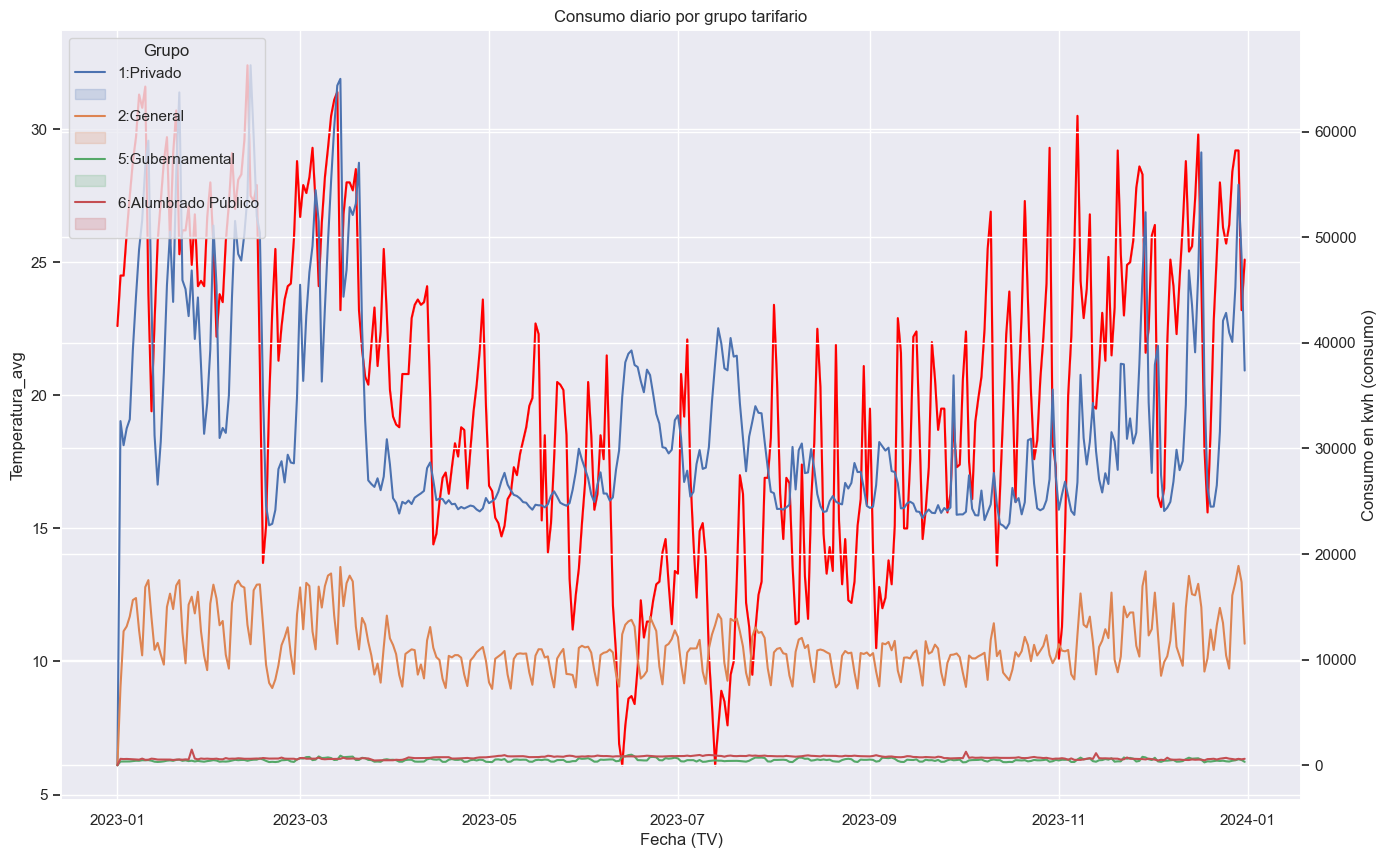

In [483]:
# Identificar la causa de los picos, valles y consumos medios.

fig, ax = plt.subplots(figsize=(16, 10))

# Variable: Temperatura
sns.lineplot(x="TV", y="Temperatura_avg",
             data=consumo_grupo_tarifario, ax=ax, color='red')
ax2 = ax.twinx()

# Target: consumo
sns.lineplot(x="TV", y="consumo",
             hue="grupo_tarifario",
             data=consumo_grupo_tarifario, ax=ax2, palette=sns.color_palette())

# Referencias
ax.set(xlabel='Fecha (TV)',
       title='Consumo diario por grupo tarifario')
ax2.set(ylabel='Consumo en kwh (consumo)')
plt.legend(title='Grupo', loc='upper left', labels=['1:Privado', '','2:General','', '5:Gubernamental', '','6:Alumbrado Público',''])
plt.show()

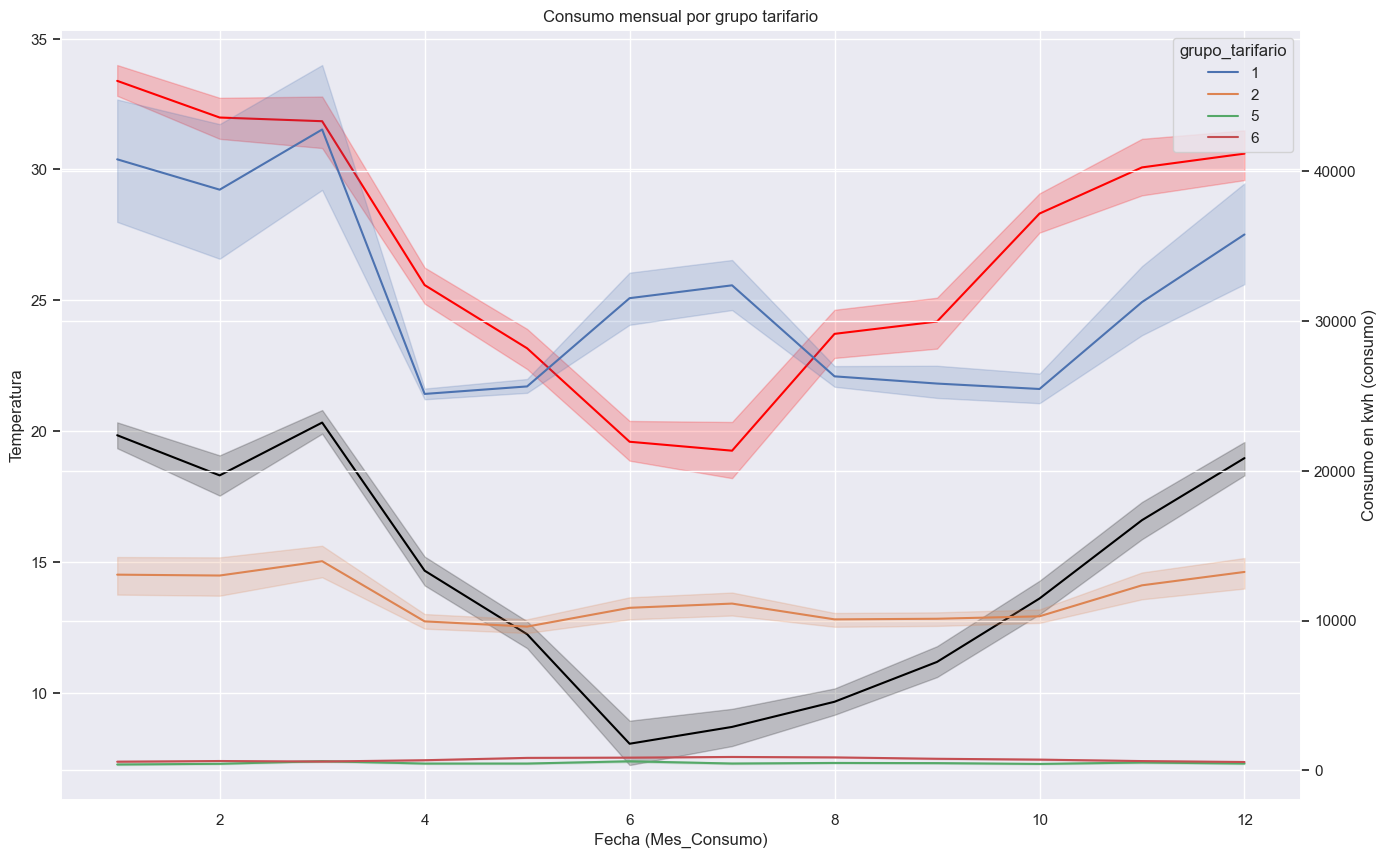

In [484]:
# Identificar la causa de los picos, valles y consumos medios.

fig, ax = plt.subplots(figsize=(16, 10))

# Variable: Temperatura Máxima
sns.lineplot(x="Mes_Consumo", y="Temperatura_max",
             data=consumo_grupo_tarifario, ax=ax, color='red')

# Variable: Temperatura Mínima
sns.lineplot(x="Mes_Consumo", y="Temperatura_min",
             data=consumo_grupo_tarifario, ax=ax, color='black')
ax2 = ax.twinx()

# Consumo
sns.lineplot(x="Mes_Consumo", y="consumo",
             hue="grupo_tarifario", 
             data=consumo_grupo_tarifario, ax=ax2, palette=sns.color_palette())

# Referencias
ax.set(xlabel='Fecha (Mes_Consumo)',
       ylabel='Temperatura',
       title='Consumo mensual por grupo tarifario')
ax2.set(ylabel='Consumo en kwh (consumo)')

plt.show()

In [485]:
# Consumo anual de energia kwh
modelo['consumo'].sum()

16223092.572059223

### Regresión linea para la predicción de la demanda energética

In [493]:
#Predicción de la demanda energética
from sklearn.model_selection import train_test_split

target = 'consumo'

x = modelo.drop(target, axis=1)
x = x.drop('TV', axis=1)
y = modelo[target]

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [494]:
# Divido el dataset
print('Entrenamiento: ', x_train.shape, y_train.shape,'\nTesting: ',x_test.shape, y_test.shape)

Entrenamiento:  (290308, 12) (290308,) 
Testing:  (124419, 12) (124419,)


In [495]:
# Creo el modelo
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print(f"Coeficientes: {model.coef_}")

Coeficientes: [ 5.88367461e+00  7.25643253e-04  5.12160835e-03  8.42054598e-02
  4.06806957e-01  1.28469651e-01  1.55511789e-02  6.70853283e-01
 -2.48493081e-01  4.56516118e+00  4.25988720e+00  1.34866631e+00]


In [496]:
model

LinearRegression()

In [497]:
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score, classification_report, confusion_matrix

# Evaluación del modelo
m2e = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {m2e}")
print(f"R2 score: {r2}")

Mean squared error: 847.9155384378922
R2 score: 0.670832872624348


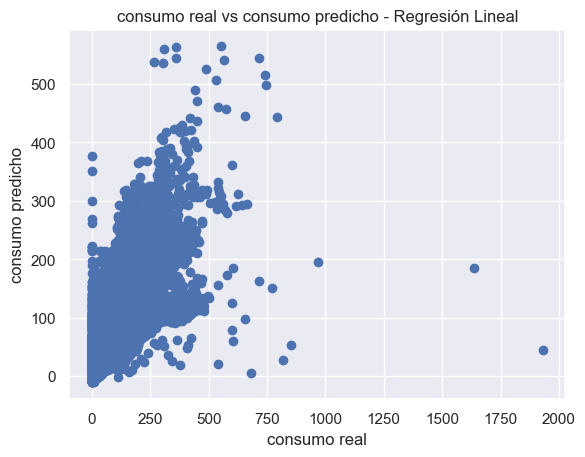

In [498]:
# Graficamos los resultados
plt.scatter(y_test, y_pred)
plt.xlabel(target+' real')
plt.ylabel(target+' predicho')
plt.title(target+' real vs '+target+' predicho - Regresión Lineal')
plt.show()